<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dataset

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
dataSet = pd.read_csv('Position_Salaries.csv')
dataSet

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#Training Linear Regression

In [82]:
x  = dataSet.iloc[:,1:-1].values
y = dataSet.iloc[:,-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

In [85]:
linearModel = LinearRegression()
linearModel.fit(x,y)
linearModel.score(x,y)
# we get around 67% accuracy

0.6690412331929895

#Training polynomial regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
polynomialReg = PolynomialFeatures(degree = 2)

In [88]:
x_poly = polynomialReg.fit_transform(x)
# x_poly is the new x now
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [89]:
polyLinearModel = LinearRegression()

In [90]:
polyLinearModel.fit(x_poly, y)

LinearRegression()

In [91]:
polyLinearModel.score(x_poly, y)
# we got around 92% accuracy

0.9162082221443942

#Visualising Linear Regression results

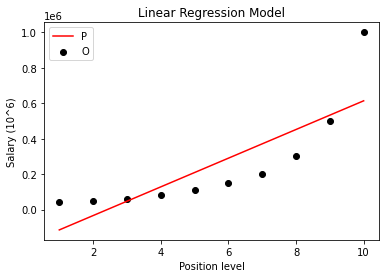

In [92]:
plt.scatter(x, y, color = 'black')
plt.plot(x , linearModel.predict(x), color = 'red')
plt.title("Linear Regression Model")
plt.xlabel("Position level")
plt.legend(('PO')) #P - predicted, O - original
plt.ylabel("Salary (10^6)")
plt.show()

#Visualising Polynomial Regression results

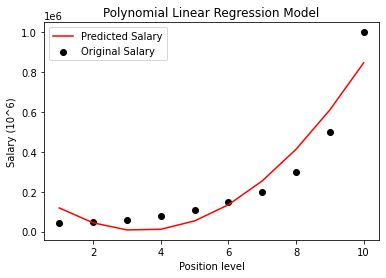

In [93]:
plt.scatter(x, y, color = 'black')
# we can do the things as below and try changing degress of freedom
plt.plot(x , polyLinearModel.predict(PolynomialFeatures(degree = 2).fit_transform(x)), color = 'red')
plt.title("Polynomial Linear Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

#Training with higher degree

In [94]:
polyReg2 = PolynomialFeatures(degree = 4)
x_poly_4degree = polyReg2.fit_transform(x)
polyLinearModel2 = LinearRegression()
polyLinearModel2.fit(x_poly_4degree, y)
# we get higher accuracy which is 99% with higher degree
# :p keep care that overfitting may catch you so as this is the simple one no worries 
# once you try on test data it can prove to be unfaithful
polyLinearModel2.score(x_poly_4degree, y)

0.9973922891706614

#Visualising on higher degree polynomial regression

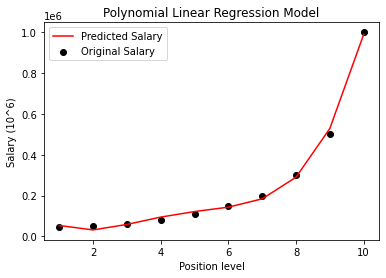

In [95]:
plt.scatter(x, y, color = 'black')
# we can do the things as below and try changing degress of freedom
plt.plot(x , polyLinearModel2.predict(PolynomialFeatures(degree = 4).fit_transform(x)), color = 'red')
plt.title("Polynomial Linear Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

#Visualising with higher resolution

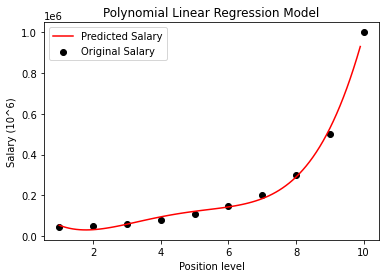

In [96]:
# use following 2 lines for high resolution for visualisation
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'black')
# we can do the things as below and try changing degress of freedom
plt.plot(X_grid , polyLinearModel2.predict(PolynomialFeatures(degree = 4).fit_transform(X_grid)), color = 'red')
plt.title("Polynomial Linear Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

#Testing the working by manual inputs

In [97]:
level = input("Enter the Level for which you want to predict salary : ")
level = np.array(level).reshape(1,-1)
print("Predicted Salary using Linear Regression for level ",level[0][0]," is ",linearModel.predict(level)[0], " Rupees!")
print("Predicted Salary using Polynomial Regression for level ",level[0][0]," is ",polyLinearModel2.predict(PolynomialFeatures(degree = 4).fit_transform(level))[0], " Rupees!")

Enter the Level for which you want to predict salary : 6.5
Predicted Salary using Linear Regression for level  6.5  is  330378.78787878784  Rupees!
Predicted Salary using Polynomial Regression for level  6.5  is  158862.45265154933  Rupees!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


#K-Fold cross Validation in Polynomial Regression

In [102]:
# 4 degree polynomial regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# create a KFold object with 5 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)
scores = cross_val_score(polyLinearModel2, x_poly_4degree, y, scoring='r2', cv=folds)
scores  

array([0.6447603, 0.9661271])

In [103]:
# 2 degree polynomial regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# create a KFold object with 5 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)
scores = cross_val_score(polyLinearModel, x_poly, y, scoring='r2', cv=folds)
scores  

array([-0.11850191,  0.61563998])